In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from math import e
from joblib import dump, load
import statistics as st
from calendar import isleap

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


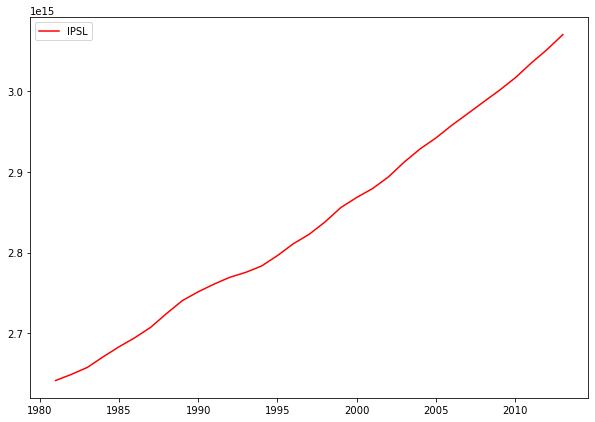

In [3]:
CO2Histvals=[]
# CO2 Data
CO2DataIPSL = xr.open_dataset('../../Data/CMIP6PollutionData/co2mass_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc')
CO2TS1=CO2DataIPSL.co2mass
CO2Ts=(CO2TS1[((CO2TS1.time.dt.month>11) | (CO2TS1.time.dt.month<2)) ].sel(time=slice('1980-12-1','2014-1-31')))
x=np.arange(1981,2014)
histCO2Ts=[]
for yr in x :
    InDString=np.datetime64(str(yr-1)+'-12-01T12:00:00')
    EnDString=np.datetime64(str(yr)+'-01-31T12:00:00')
   # print(EnDString)
    CO2T=CO2Ts.sel(time=slice(InDString,EnDString))
   # print(rhT.time)
    histCO2Ts.append(CO2T.mean())
CO2Histvals.append(histCO2Ts) 

fig = plt.figure(figsize=(10,7))
plt.plot(x,CO2Histvals[0],label='IPSL',color='Red')
plt.legend()

plt.savefig('HistCO2_Anthropogenic.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


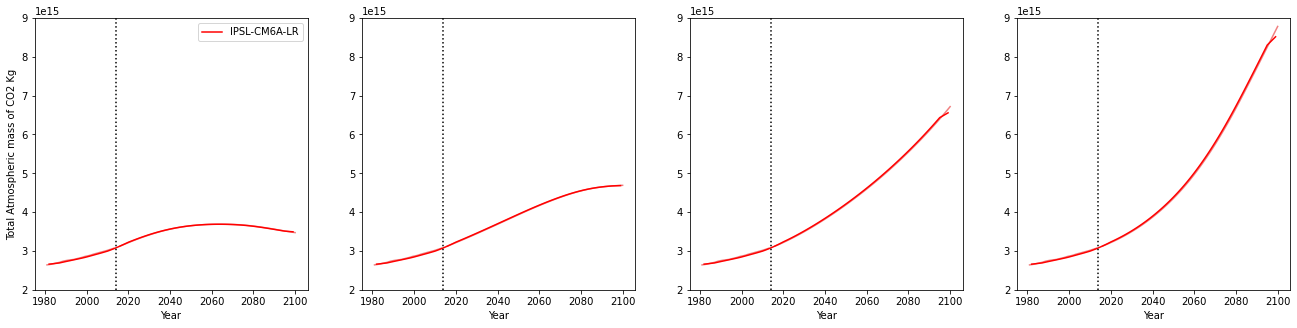

In [6]:
ssps=['126','245','370','585']
fig = plt.figure(figsize=(22.5,5))

i=1
for sp in ssps:
    
    x=np.arange(1981,2014)

    plt.subplot(1, 4, i)

    #plt.plot(x,EnsBCHist,label='Historical',color='gainsboro')
    plt.plot(x,CO2Histvals[0],color='lightcoral')
    #plt.plot(x,CO2Histvals[1],color='cornflowerblue')
    x=np.arange(2016,2101)
    CO2Fut=[]
# CO2 Data
    CO2DataIPSL = xr.open_dataset('../../Data/CMIP6PollutionData/co2mass_Amon_IPSL-CM6A-LR_ssp'+sp+'_r1i1p1f1_gr_201501-210012.nc')

    CO2TS1=CO2DataIPSL.co2mass

    CO2Ts=(CO2TS1[((CO2TS1.time.dt.month>11) | (CO2TS1.time.dt.month<2)) ].sel(time=slice('2015-12-1','2100-1-31')))
    #x=np.arange(1981,2014)
    histCO2Ts=[]
    for yr in x :
        InDString=np.datetime64(str(yr-1)+'-12-01T12:00:00')
        EnDString=np.datetime64(str(yr)+'-01-31T12:00:00')
   # print(EnDString)
        CO2T=CO2Ts.sel(time=slice(InDString,EnDString))
   # print(rhT.time)
        histCO2Ts.append(CO2T.mean())
    CO2Fut.append(histCO2Ts) 

    
    plt.plot(x,CO2Fut[0],color='lightcoral')
    jointList=CO2Histvals[0]+CO2Fut[0]
    S = pd.Series (jointList)
    xTotal=np.arange(1982,2100)
    rENS=S.rolling(10, center=True, min_periods=1).mean()
    plt.plot(xTotal,rENS,label='IPSL-CM6A-LR',color='red')
    #plt.plot(x,CO2Fut[1],color='cornflowerblue')
    
    plt.ylim(2e15,9e15)
    plt.axvline(x=2014,color='black',linestyle=':')
    plt.xlabel('Year') 
    if i == 1:
        plt.legend()
        plt.ylabel('Total Atmospheric mass of CO2 Kg')
    i=i+1

plt.savefig('CO2_ts_panel_10YearMean.eps')
plt.show()
        